In [1]:
# library for project
import pandas as pd #library for dataframe
import matplotlib.pyplot as plt #library for visualizatio
import seaborn as sns #library for visualizatio
from sklearn.model_selection import train_test_split #splitting data test and train
import numpy as np # for scientific computing (math high level)

In [2]:
# Make data so that mix if want split data train or test
def Importdata(file):
    """
    Function for import data and drop duplicate
    param : Function (file<input file name>) just format (csv)
    return data
    """
    
    data = pd.read_csv(file, sep=';', skiprows=0)
    print("Data real            : ", data.shape, "- (#observation, #column)")

    data = data.drop_duplicates()
    print("after drop data : ", data.shape, "- (#observation, #column)")
    
    return data

In [3]:
#input
file_data = "bank-full.csv"

#call function
data_analisa = Importdata(file = file_data)

Data real            :  (45211, 17) - (#observation, #column)
after drop data :  (45211, 17) - (#observation, #column)


In [4]:
# Check missing nulls
data_analisa.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [5]:
# Check data
data_analisa.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

Short Summary:
1. Data duplicate is 0
2. Data null is 0
3. Data types is correct

# Data Splitting

Data output is ['y']

In [6]:
# make function separate input, output
def SeparateOutputInput(data,
                       output_column_name):
    """
    The Function for separate data input and output
    input data for target/output and the drop or separate
    make new variable for input and output data
    """
    
    output_data = data[output_column_name]
    input_data = data.drop(output_column_name,
                           axis = 1)
    
    return input_data, output_data

In [7]:
# call function
X, y = SeparateOutputInput(data = data_analisa,
                          output_column_name = "y")

In [8]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 123)
# print shape
print(X_train.shape)
print(X_test.shape)

(36168, 16)
(9043, 16)


# Exploratory Data Analysis (EDA)

In [9]:
# we need data train from input and ouput

data_analysis = pd.merge(X_train, y_train, left_index=True, right_index=True)

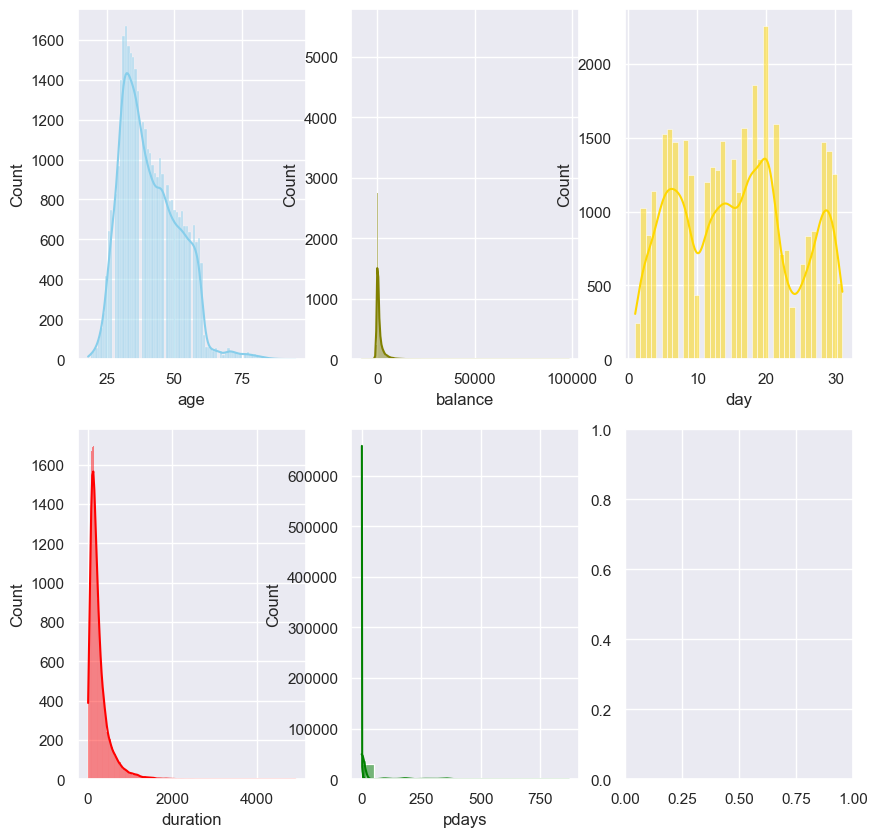

In [10]:
# Check distribution data

sns.set(style="darkgrid")

fig, axs = plt.subplots(2, 3, figsize=(10, 10))

sns.histplot(data=data_analysis, x="age", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=data_analysis, x="balance", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=data_analysis, x="day", kde=True, color="gold", ax=axs[0, 2])
sns.histplot(data=data_analysis, x="duration", kde=True, color="red", ax=axs[1, 0])
sns.histplot(data=data_analysis, x="pdays", kde=True, color="green", ax=axs[1, 1])
sns.histplot(data=data_analysis, x="previous", kde=True, color="green", ax=axs[1, 1])

plt.show()

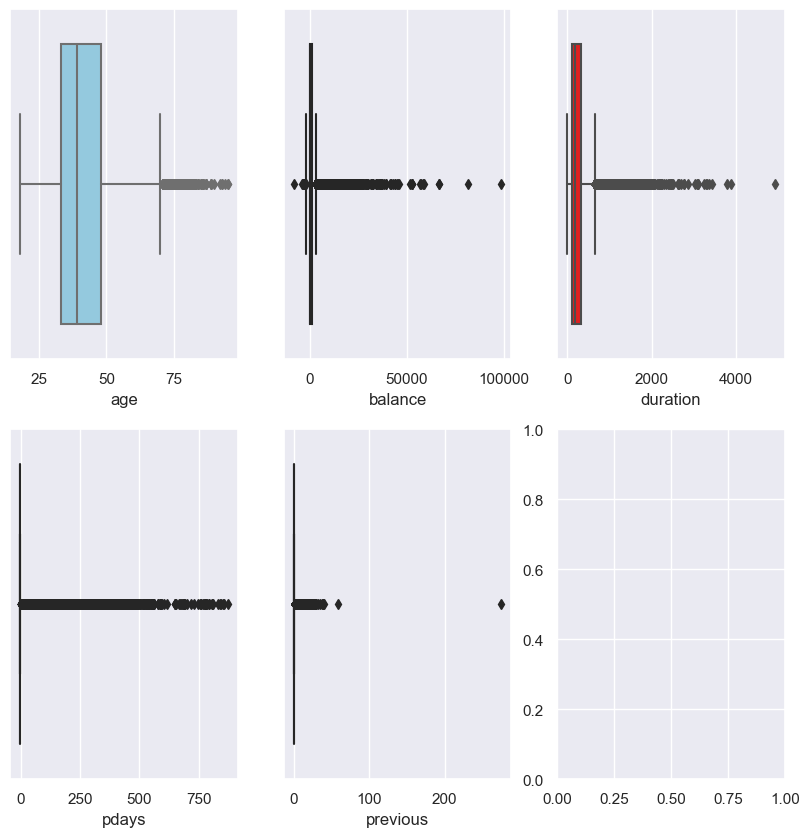

In [11]:
# Check Outlier with boxplot

sns.set(style="darkgrid")

fig, axs = plt.subplots(2, 3, figsize=(10, 10))

sns.boxplot(data=data_analysis, x="age", color="skyblue", ax=axs[0, 0])
sns.boxplot(data=data_analysis, x="balance", color="olive", ax=axs[0, 1])
sns.boxplot(data=data_analysis, x="duration", color="red", ax=axs[0, 2])
sns.boxplot(data=data_analysis, x="pdays", color="green", ax=axs[1, 0])
sns.boxplot(data=data_analysis, x="previous", color="green", ax=axs[1, 1])

plt.show()

In [12]:
# function to detect outlier using IQR
def detect_outliers_iqr(data):

    outliers = [] # simpan data dalam bentuk list
    data = sorted(data) # sort data values
    q1 = np.percentile(data, 25) # compute the q1
    q3 = np.percentile(data, 75) # compute the q3   
    IQR = q3-q1 # compute the IQR
    lwr_bound = q1-(1.5*IQR) # set the lower bound
    upr_bound = q3+(1.5*IQR) # set the upper bound
    print("lower:",lwr_bound, "upper:", upr_bound)

    # looping columns
    for i in data:

        if (i<lwr_bound or i>upr_bound):

            outliers.append(i)

    return outliers

In [13]:
# Check data outlier
"""
I just delete on 5 columns because this is
relevant for see outlier data
"""

outlier_columns = ['balance', 'duration', 'pdays', 'previous', 'age']

for col in outlier_columns:

    outlier = detect_outliers_iqr(data_analysis[col])
    print("number of outliers in column", f"'{str(col)}'", "is", len(outlier))
    print()

lower: -1989.5 upper: 3510.5
number of outliers in column 'balance' is 3778

lower: -221.375 upper: 643.625
number of outliers in column 'duration' is 2628

lower: -1.0 upper: -1.0
number of outliers in column 'pdays' is 6594

lower: 0.0 upper: 0.0
number of outliers in column 'previous' is 6594

lower: 10.5 upper: 70.5
number of outliers in column 'age' is 385



In [14]:
# search dataframe outlier
# upper outlier

condition_outlier_upper = data_analysis[(data_analysis['balance'] >= 3510) & 
                                        (data_analysis['duration'] >= 643.625)&
                                        (data_analysis['pdays'] >= -1) &
                                        (data_analysis['previous'] >= 0) &
                                        (data_analysis['age'] >= 70.5)]
condition_outlier_upper.count()

age          16
job          16
marital      16
education    16
default      16
balance      16
housing      16
loan         16
contact      16
day          16
month        16
duration     16
campaign     16
pdays        16
previous     16
poutcome     16
y            16
dtype: int64

In [15]:
# search dataframe outlier
# Condition lower outlier

condition_outlier_lower = data_analysis[(data_analysis['balance'] < -1989.5) & 
                                            (data_analysis['duration'] < -221.375)&
                                            (data_analysis['pdays'] < -1) &
                                            (data_analysis['previous'] < 0) &
                                            (data_analysis['age'] < 10.5)]
condition_outlier_lower.count()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

New insight : for data outlier for upper bound amount 16 data and lower bound is nothing 

Analysis with ouput ['y']

In [16]:
# we see relate unique yes on column ['y']

analysis_y = data_analysis[(data_analysis['y']=='yes')]
analysis_y

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
41425,55,management,married,primary,no,2587,no,no,cellular,4,sep,328,2,94,2,success,yes
14938,42,services,married,secondary,no,3465,yes,yes,cellular,16,jul,1039,2,-1,0,unknown,yes
14101,49,blue-collar,married,secondary,no,3728,yes,no,cellular,11,jul,1060,2,-1,0,unknown,yes
43912,56,admin.,married,secondary,no,602,no,no,cellular,14,jun,458,1,130,8,success,yes
43334,52,technician,single,secondary,no,436,no,yes,unknown,22,mar,95,1,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44186,60,retired,divorced,tertiary,no,979,yes,no,cellular,15,jul,346,1,181,4,success,yes
24134,49,management,married,secondary,no,249,no,no,telephone,6,nov,234,1,-1,0,unknown,yes
42664,45,admin.,married,secondary,no,5021,no,no,cellular,14,jan,233,1,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes


We want know median from a few columns (we use median because distribution data is skew positif)

In [17]:
# median by age
aggregate_age = analysis_y['age'].median()
aggregate_age

38.0

In [18]:
# median by balance
aggregate_balance = analysis_y['balance'].median()
aggregate_balance

755.0

In [19]:
# median by duration
aggregate_duration = analysis_y['duration'].median()
aggregate_duration

429.0

Insights for median :
1. Median of Age is 38 years
2. Median of Balance is 755 
3. Median of duration is 429

make visualization with 'Yes' condition on columns ['y'] with background parameter

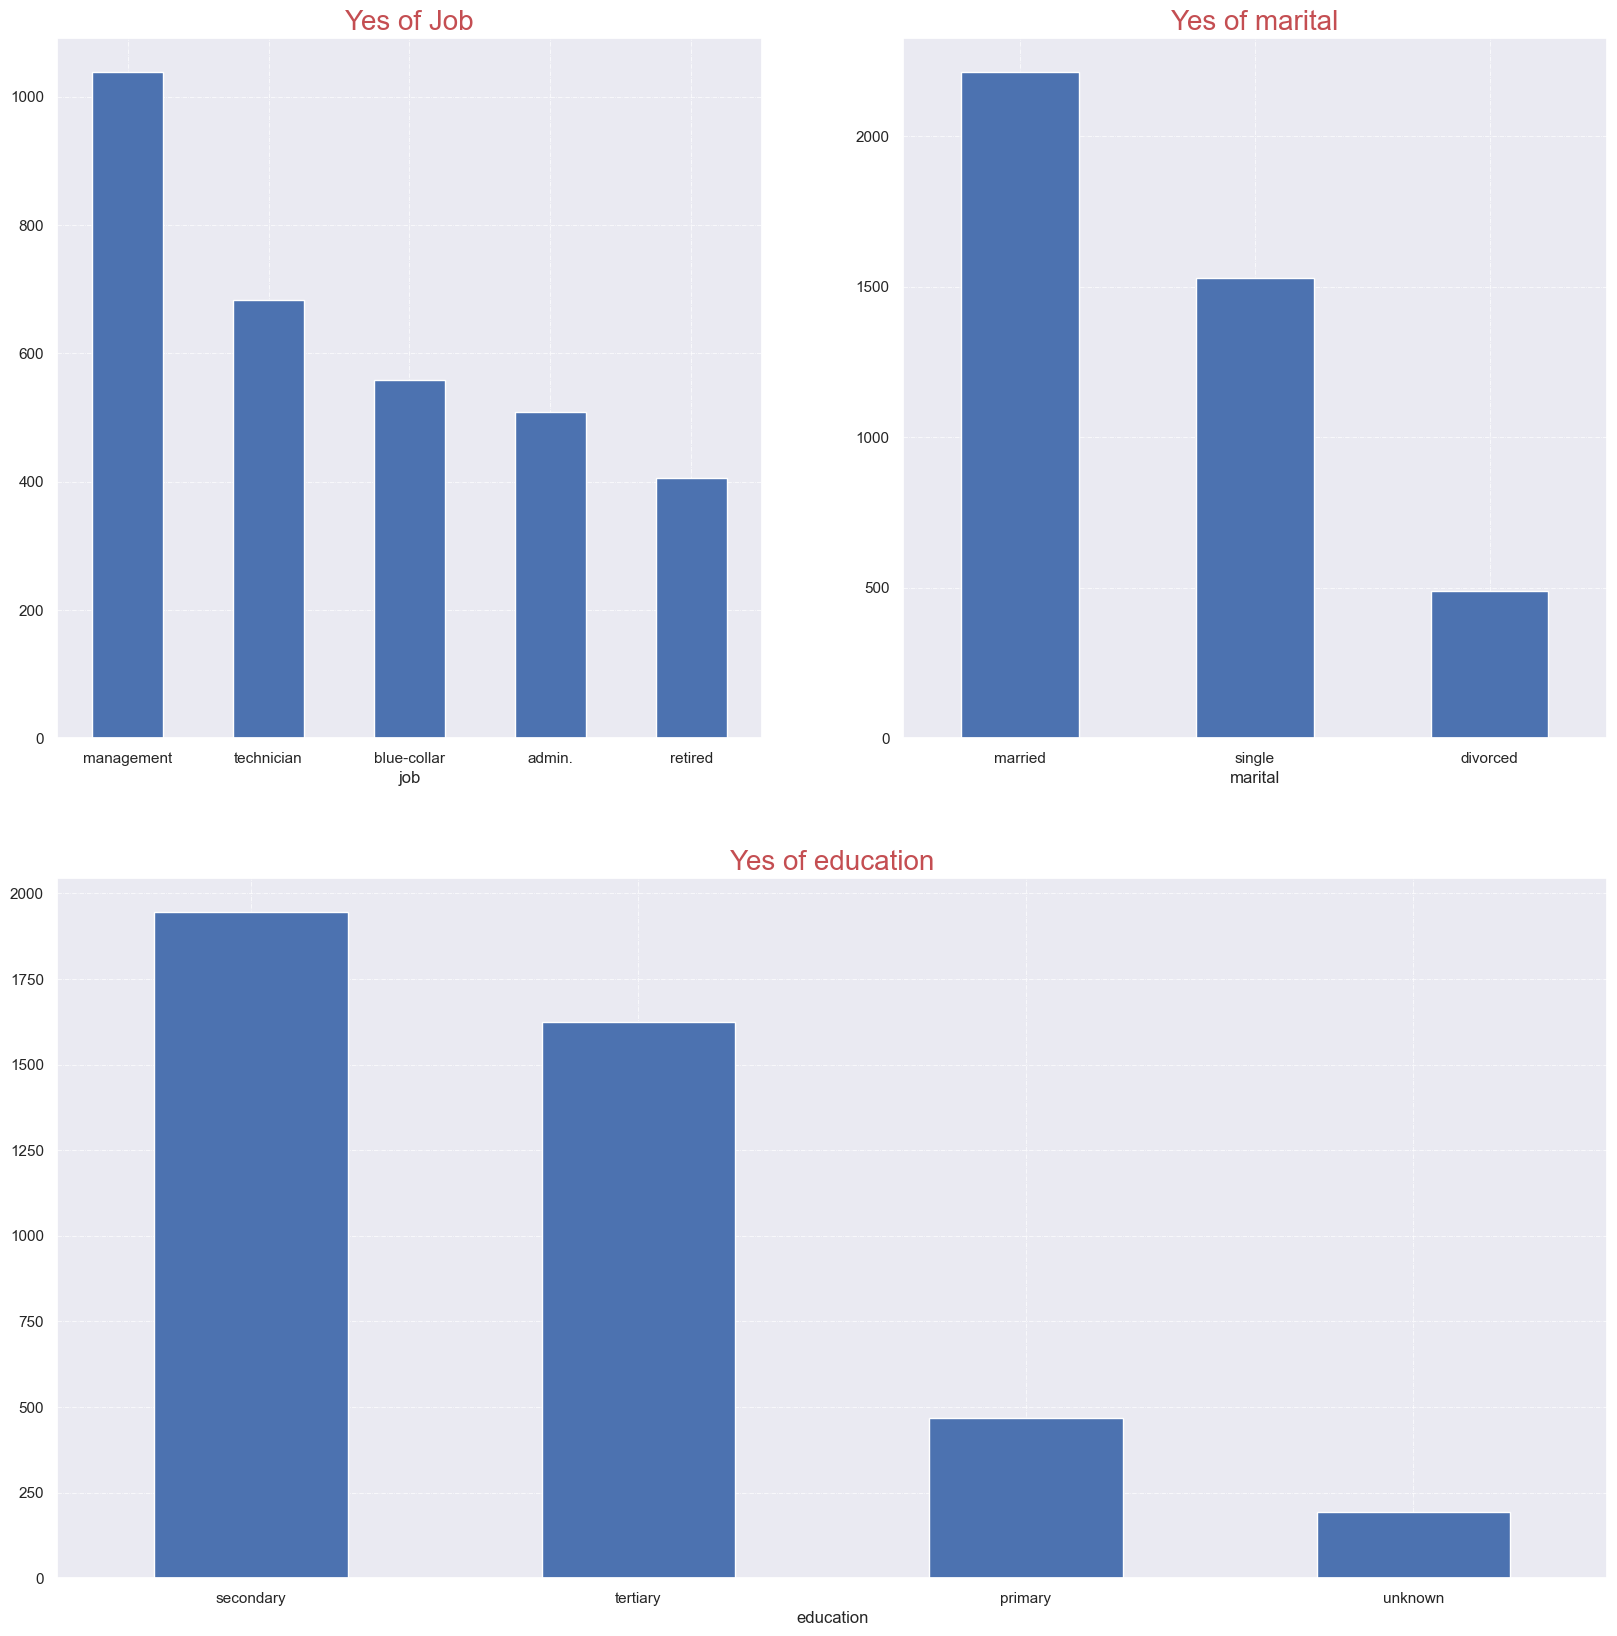

In [20]:
# make visualization
# group by data base on category
con_job  = analysis_y.groupby(["job"])["job"].count().sort_values(ascending=False).head(5)
con_marital  = analysis_y.groupby(["marital"])["marital"].count().sort_values(ascending=False).head(5)
con_education  = analysis_y.groupby(["education"])["education"].count().sort_values(ascending=False).head(5)

# Visualization of age
plt.subplot(2, 2, 1)
con_job.plot(x="job", y="job", kind="bar", figsize=(20, 20), rot= 0)
plt.title ("Yes of Job", size = 20, c = 'r')
plt.minorticks_on()
plt.grid(True, linewidth = 0.5, linestyle = '-.')

# Visualization of martial
plt.subplot(2, 2, 2)
con_marital.plot(x="marital", y="marital", kind="bar", figsize=(20, 20), rot= 0)
plt.title ("Yes of marital", size = 20, c = 'r')
plt.minorticks_on()
plt.grid(True, linewidth = 0.5, linestyle = '-.')

# Visualization of education
plt.subplot(2, 1, 2)
con_education.plot(x="education", y="education", kind="bar", figsize=(20, 20), rot= 0)
plt.title ("Yes of education", size = 20, c = 'r')
plt.minorticks_on()
plt.grid(True, linewidth = 0.5, linestyle = '-.')

make visualization with 'Yes' condition on columns ['y'] with charge responsibility parameter

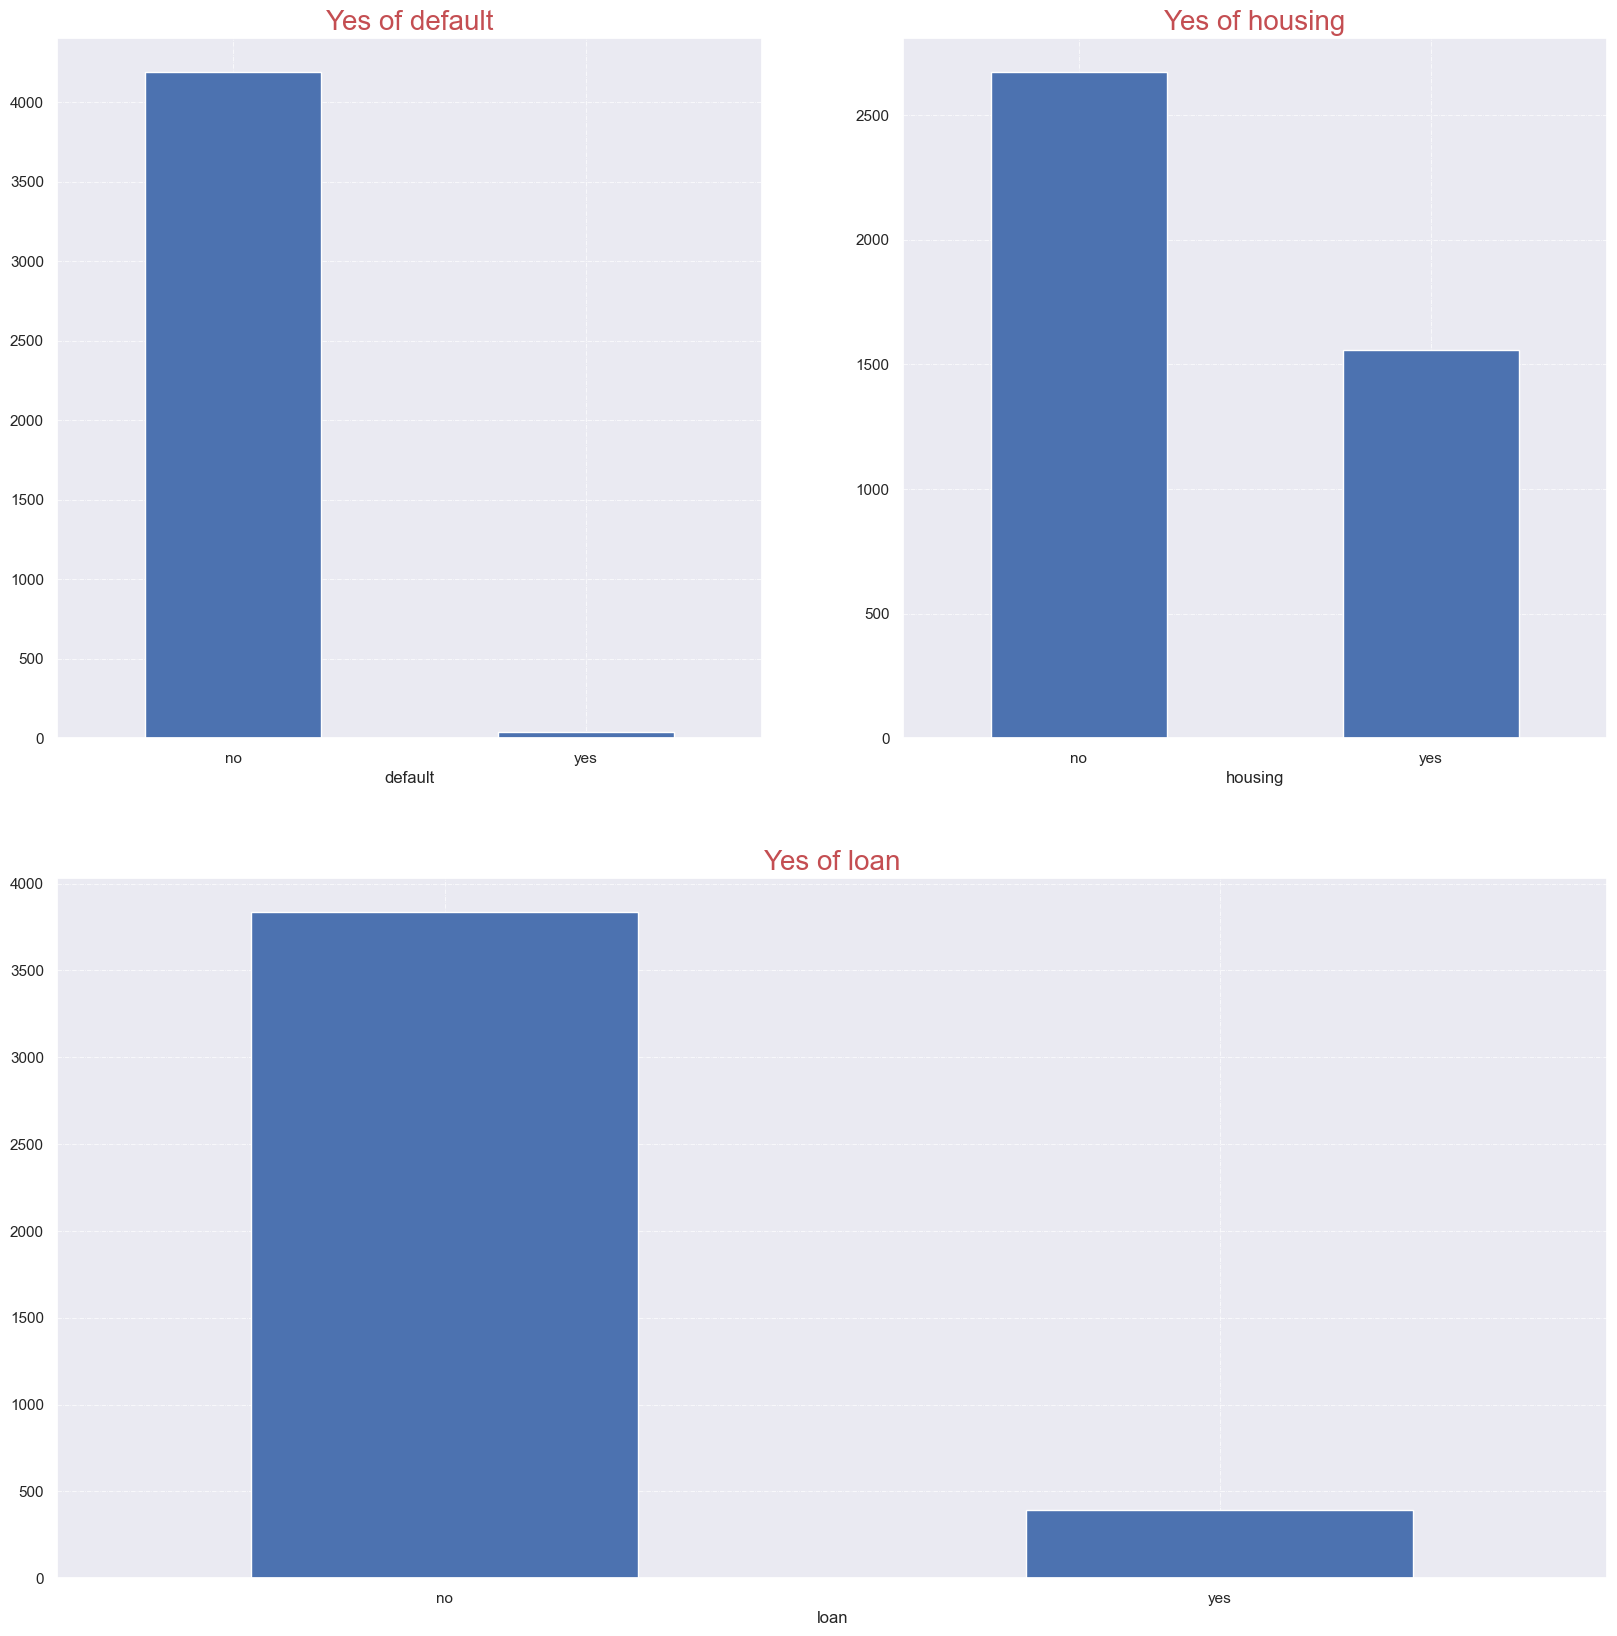

In [21]:
# make visualization 
# group by data base on category
con_def  = analysis_y.groupby(["default"])["default"].count().sort_values(ascending=False).head(5)
con_house  = analysis_y.groupby(["housing"])["housing"].count().sort_values(ascending=False).head(5)
con_loan  = analysis_y.groupby(["loan"])["loan"].count().sort_values(ascending=False).head(5)

# Visualization of default
plt.subplot(2, 2, 1)
con_def.plot(x="default", y="default", kind="bar", figsize=(20, 20), rot= 0)
plt.title ("Yes of default", size = 20, c = 'r')
plt.minorticks_on()
plt.grid(True, linewidth = 0.5, linestyle = '-.')

# Visualization of housing
plt.subplot(2, 2, 2)
con_house.plot(x="housing", y="housing", kind="bar", figsize=(20, 20), rot= 0)
plt.title ("Yes of housing", size = 20, c = 'r')
plt.minorticks_on()
plt.grid(True, linewidth = 0.5, linestyle = '-.')

# Visualization of loan
plt.subplot(2, 1, 2)
con_loan.plot(x="loan", y="loan", kind="bar", figsize=(20, 20), rot= 0)
plt.title ("Yes of loan", size = 20, c = 'r')
plt.minorticks_on()
plt.grid(True, linewidth = 0.5, linestyle = '-.')

make visualization with 'Yes' condition on columns ['y'] with contact customer parameter

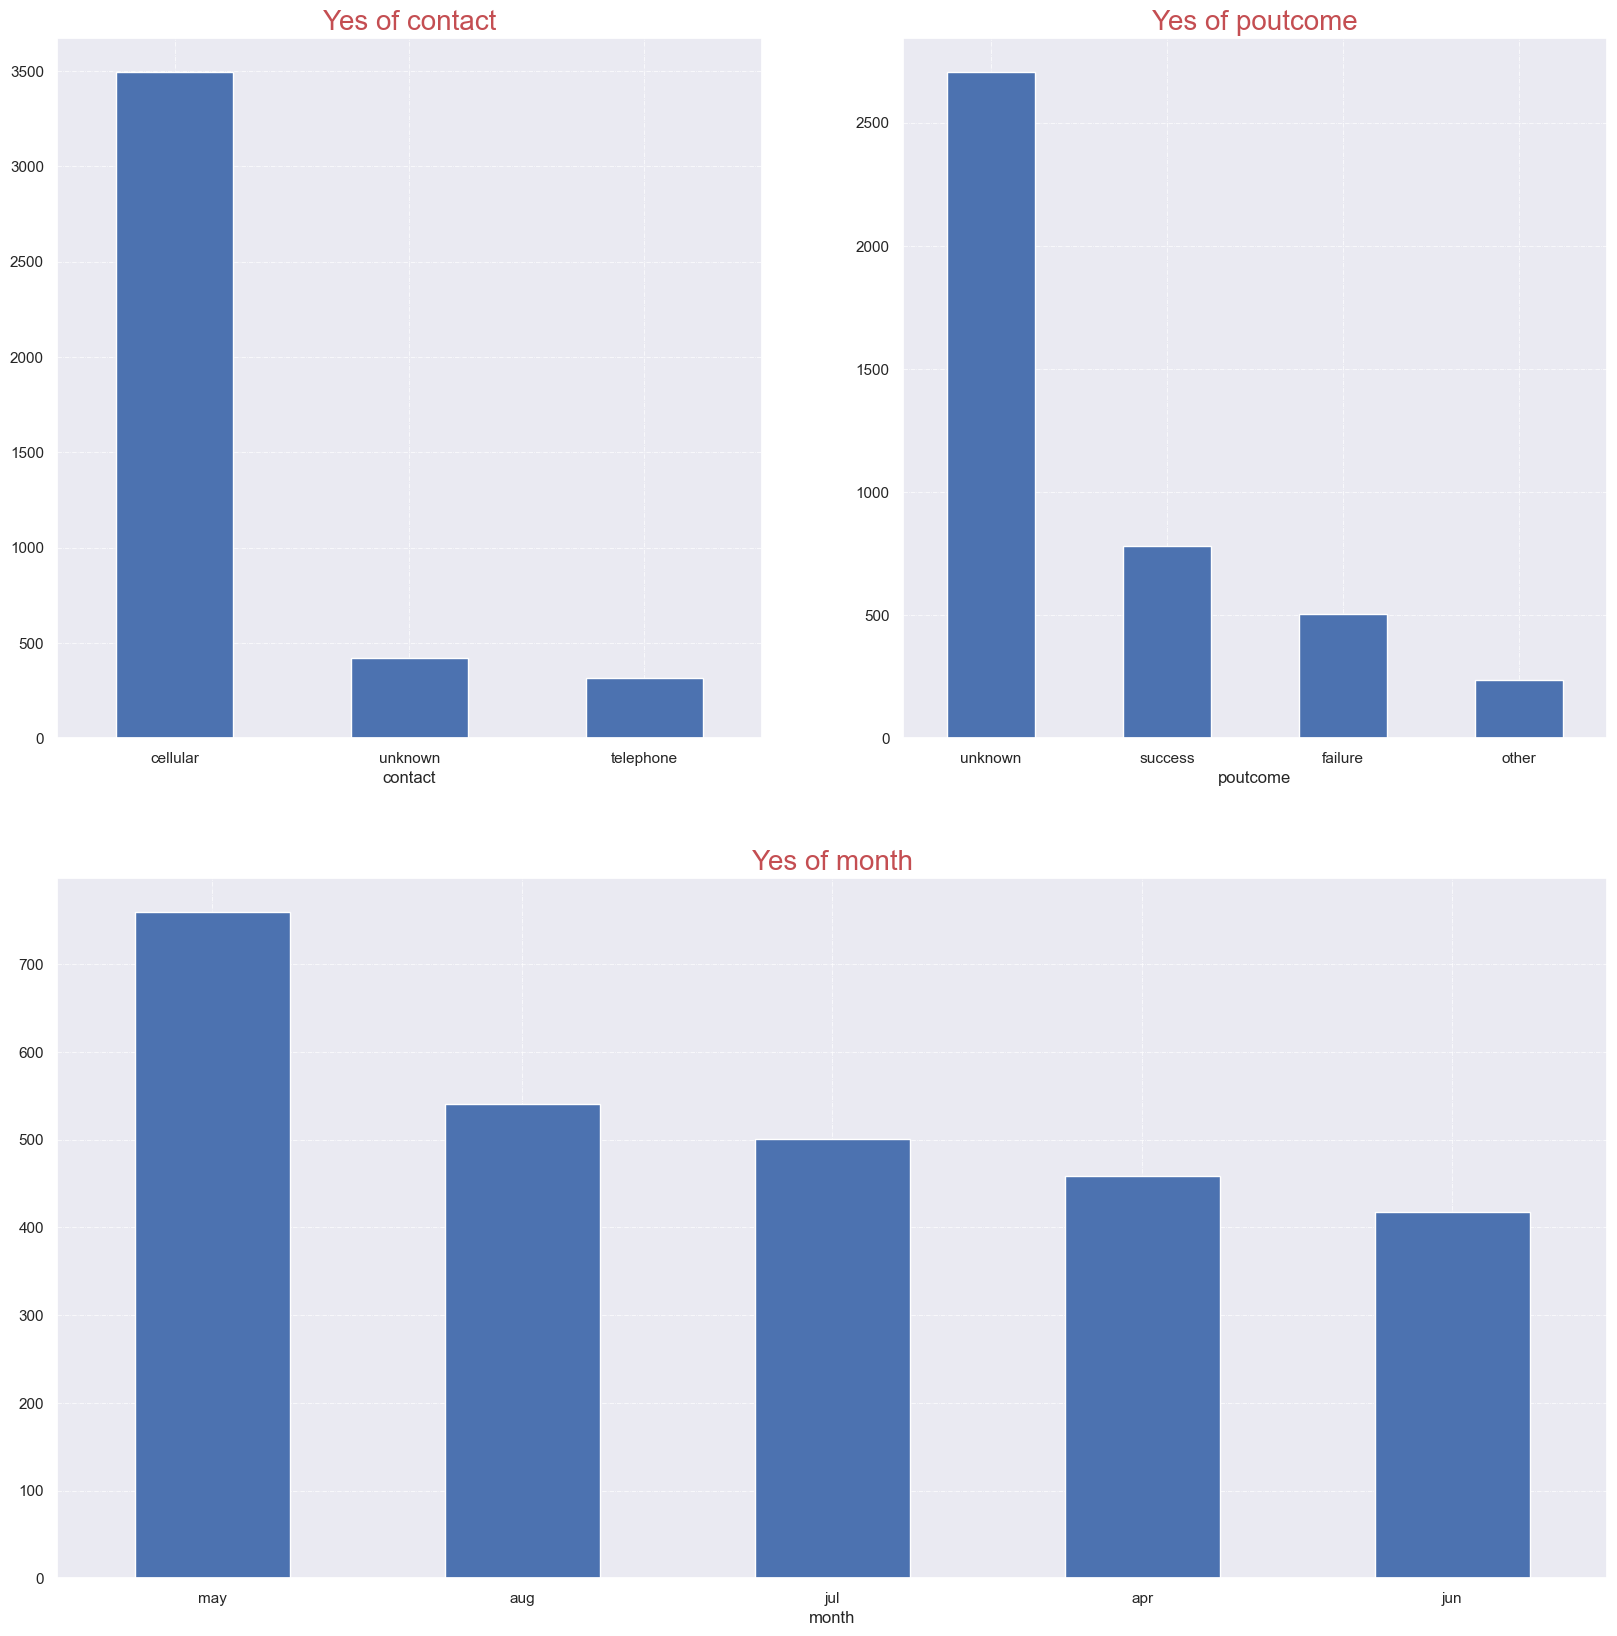

In [22]:
# make visualization 
# group by data base on category
con_cont  = analysis_y.groupby(["contact"])["contact"].count().sort_values(ascending=False).head(5)
con_day  = analysis_y.groupby(["poutcome"])["poutcome"].count().sort_values(ascending=False).head(5)
con_mon  = analysis_y.groupby(["month"])["month"].count().sort_values(ascending=False).head(5)

# Visualization of contact
plt.subplot(2, 2, 1)
con_cont.plot(x="contact", y="contact", kind="bar", figsize=(20, 20), rot= 0)
plt.title ("Yes of contact", size = 20, c = 'r')
plt.minorticks_on()
plt.grid(True, linewidth = 0.5, linestyle = '-.')

# Visualization of poutcome
plt.subplot(2, 2, 2)
con_day.plot(x="poutcome", y="poutcome", kind="bar", figsize=(20, 20), rot= 0)
plt.title ("Yes of poutcome", size = 20, c = 'r')
plt.minorticks_on()
plt.grid(True, linewidth = 0.5, linestyle = '-.')

# Visualization of month
plt.subplot(2, 1, 2)
con_mon.plot(x="month", y="month", kind="bar", figsize=(20, 20), rot= 0)
plt.title ("Yes of month", size = 20, c = 'r')
plt.minorticks_on()
plt.grid(True, linewidth = 0.5, linestyle = '-.')

New Insight by 'Yes' condition:
1. sum of 'yes' condition for job the highest is 'Manajemen'
2. sum of 'yes' condition for marital the highest is 'married'
3. sum of 'yes' condition for education the highest is 'secondary'
4. sum of 'yes' condition for default the highest is 'no'
5. sum of 'yes' condition for housing the highest is 'no'
6. sum of 'yes' condition for loan the loan is 'no'
7. sum of 'yes' condition for contact the contact is 'celluler'
8. sum of 'yes' condition for poutcome the poutcome is 'unkown'
9. sum of 'yes' condition for month the month is 'may'

In [23]:
# we see relate unique yes on column ['y']

analysis_n = data_analysis[(data_analysis['y']=='no')]
analysis_n

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
28686,29,services,single,secondary,no,-205,no,no,cellular,30,jan,194,1,-1,0,unknown,no
9304,53,blue-collar,married,primary,no,0,yes,no,unknown,5,jun,285,2,-1,0,unknown,no
44803,30,technician,single,tertiary,no,0,no,no,cellular,15,sep,214,2,-1,0,unknown,no
5878,30,unemployed,married,secondary,no,529,yes,yes,unknown,26,may,107,3,-1,0,unknown,no
3814,27,blue-collar,single,primary,no,0,yes,no,unknown,16,may,576,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23766,43,management,single,tertiary,no,946,no,no,telephone,28,aug,40,1,-1,0,unknown,no
15377,36,management,married,tertiary,no,635,yes,no,cellular,18,jul,359,1,-1,0,unknown,no
17730,43,blue-collar,married,primary,no,3664,no,no,telephone,29,jul,274,1,-1,0,unknown,no
28030,55,unemployed,married,primary,no,8585,no,no,telephone,28,jan,201,2,-1,0,unknown,no


We want know median from a few columns (we use median because distribution data is skew positif)

In [24]:
# median by age
aggregate_age = analysis_n['age'].median()
aggregate_age

39.0

In [25]:
# median by balance
aggregate_balance = analysis_n['balance'].median()
aggregate_balance

416.0

In [26]:
# median by duration
aggregate_duration = analysis_n['duration'].median()
aggregate_duration

164.0

Insights for median :

    Median of Age is 39 years
    Median of Balance is 416
    Median of duration is 164



make visualization with 'No' condition on columns ['y'] with background parameter

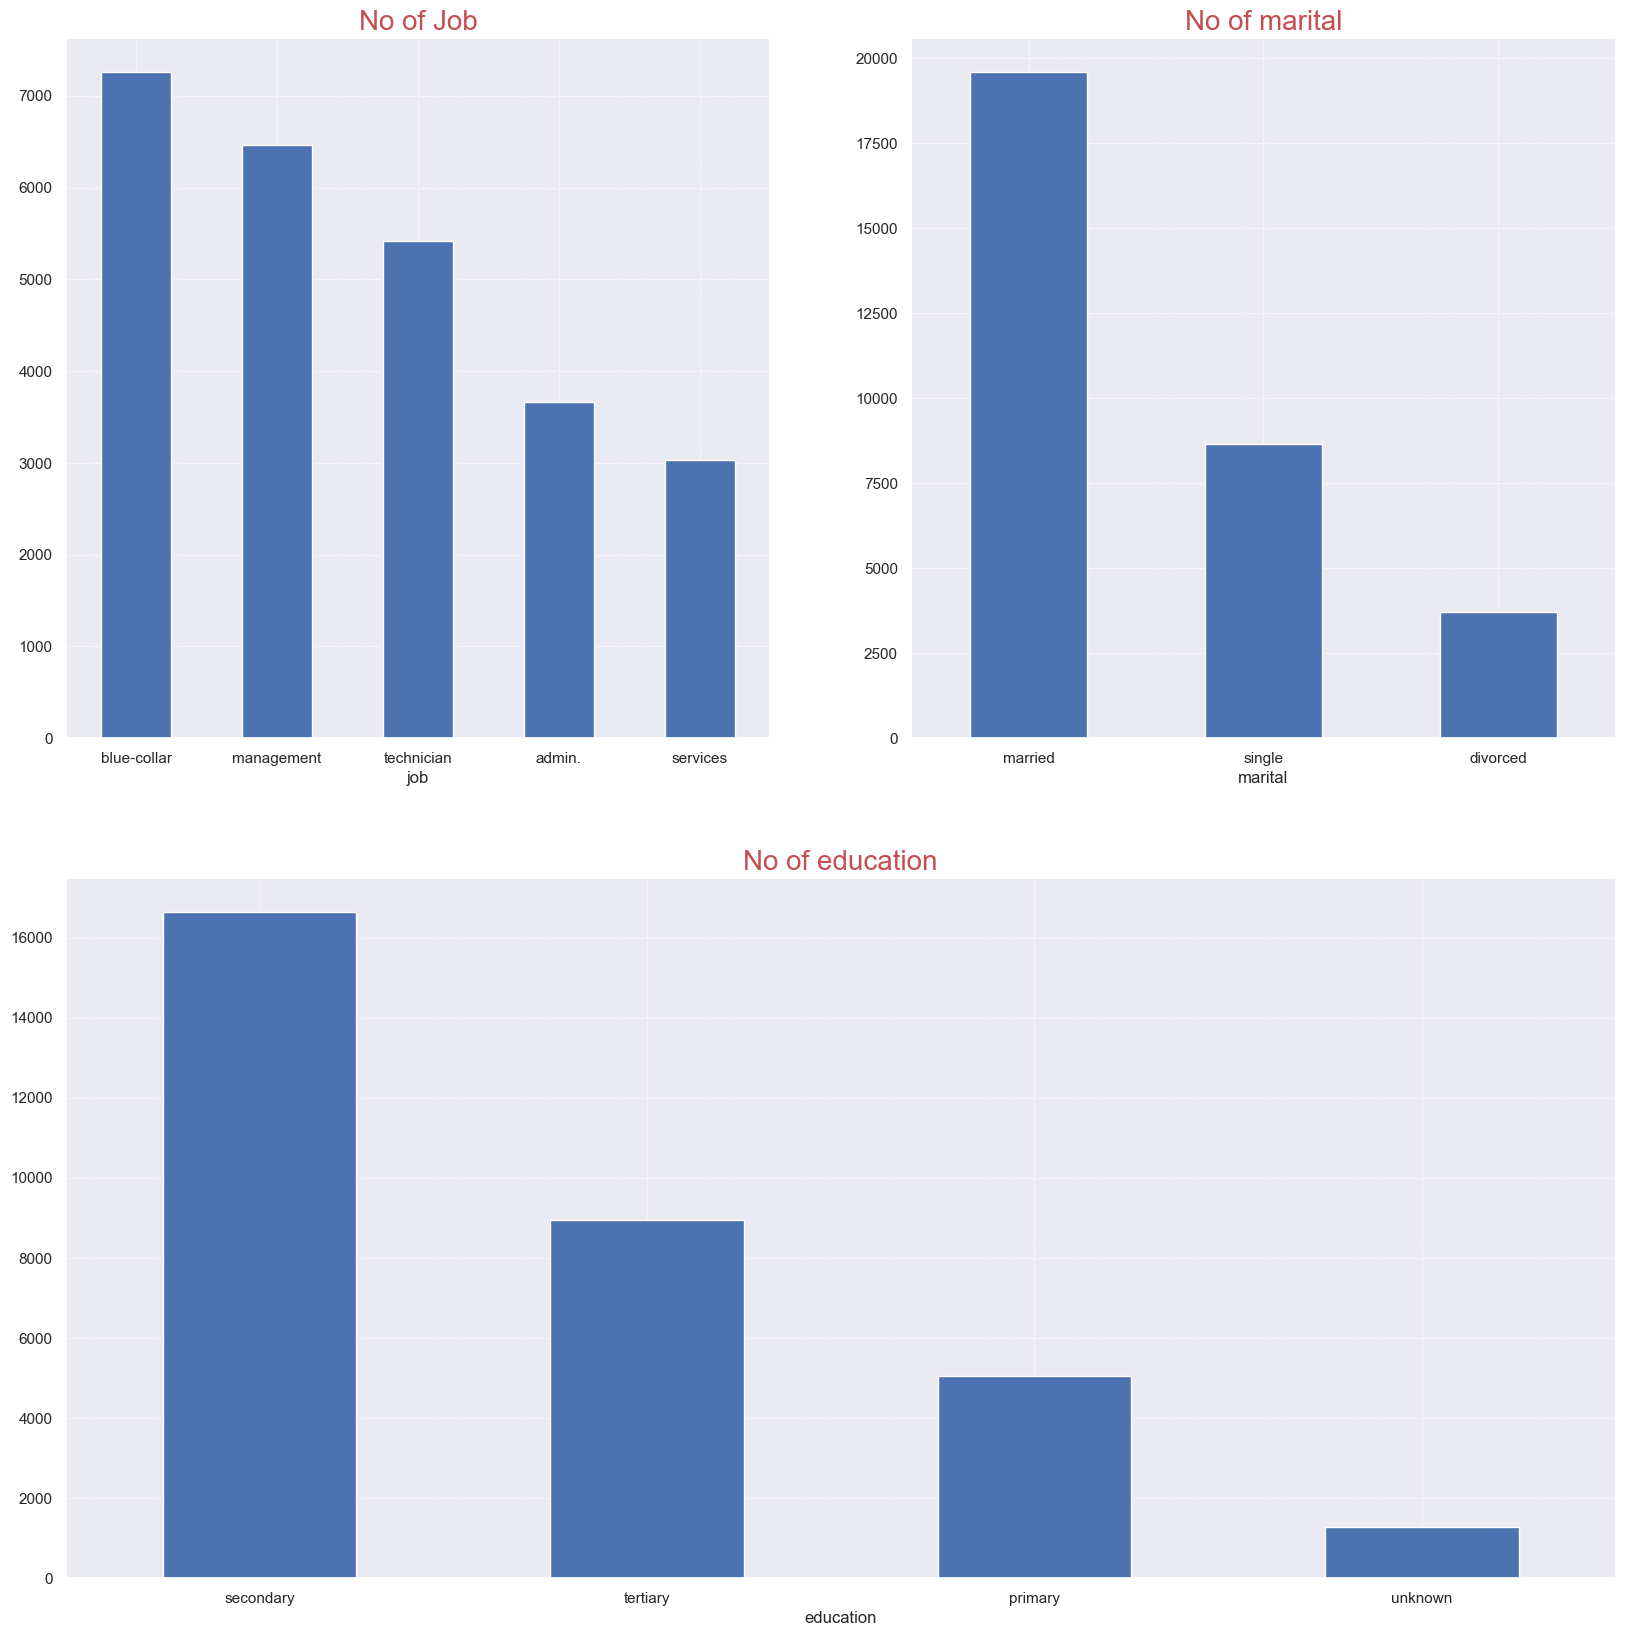

In [27]:
# make visualization
# group by data base on category
con_job_n  = analysis_n.groupby(["job"])["job"].count().sort_values(ascending=False).head(5)
con_marital_n  = analysis_n.groupby(["marital"])["marital"].count().sort_values(ascending=False).head(5)
con_education_n  = analysis_n.groupby(["education"])["education"].count().sort_values(ascending=False).head(5)

# Visualization of age
plt.subplot(2, 2, 1)
con_job_n.plot(x="job", y="job", kind="bar", figsize=(20, 20), rot= 0)
plt.title ("No of Job", size = 20, c = 'r')
plt.minorticks_on()
plt.grid(True, linewidth = 0.5, linestyle = '-.')

# Visualization of martial
plt.subplot(2, 2, 2)
con_marital_n.plot(x="marital", y="marital", kind="bar", figsize=(20, 20), rot= 0)
plt.title ("No of marital", size = 20, c = 'r')
plt.minorticks_on()
plt.grid(True, linewidth = 0.5, linestyle = '-.')

# Visualization of education
plt.subplot(2, 1, 2)
con_education_n.plot(x="education", y="education", kind="bar", figsize=(20, 20), rot= 0)
plt.title ("No of education", size = 20, c = 'r')
plt.minorticks_on()
plt.grid(True, linewidth = 0.5, linestyle = '-.')

make visualization with 'No' condition on columns ['y'] with charge responsibility parameter

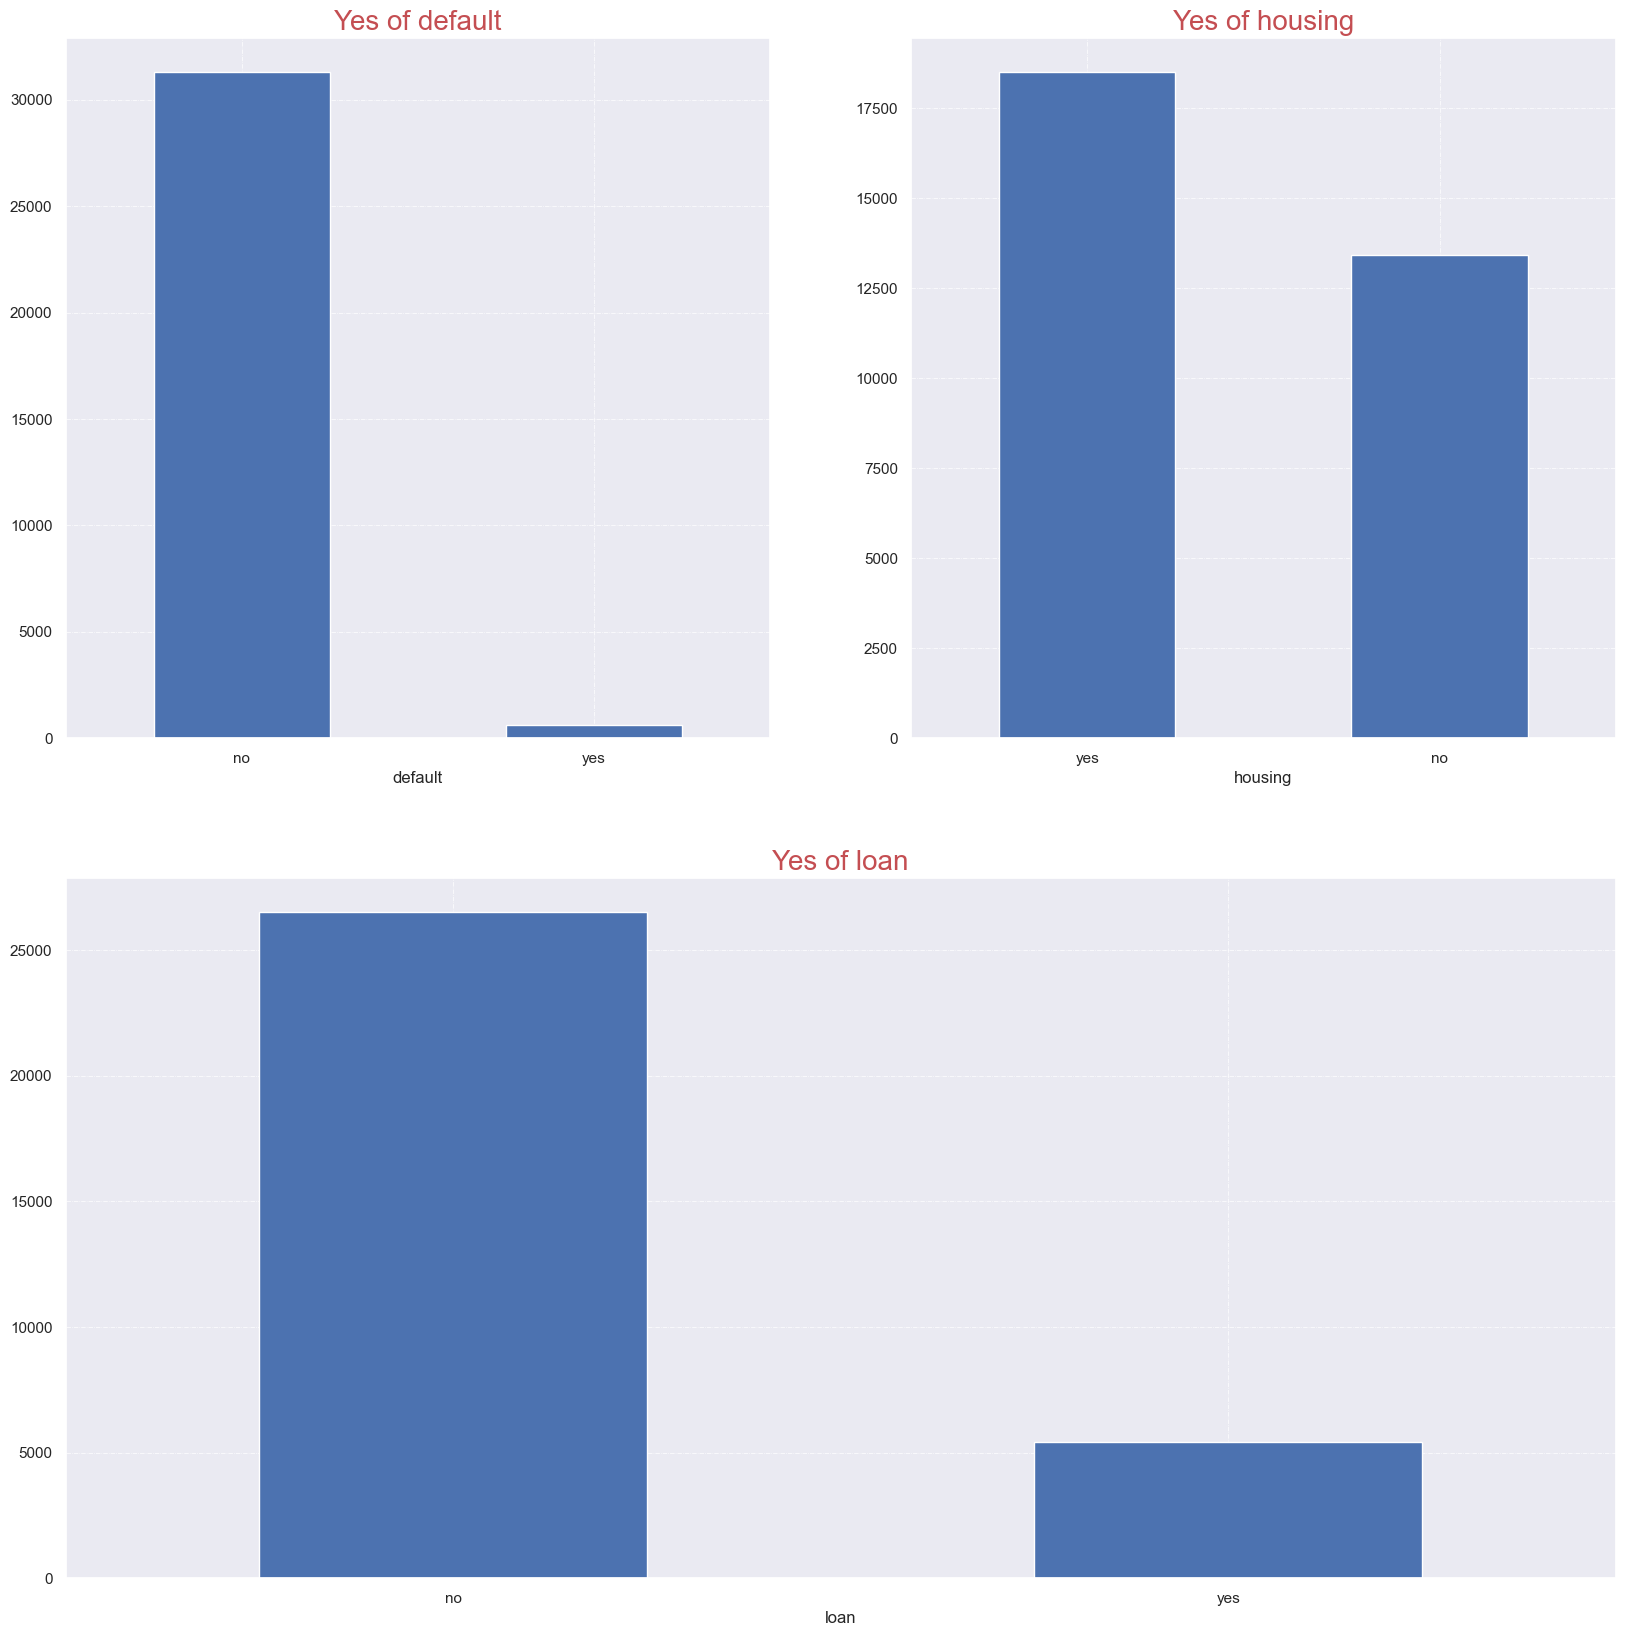

In [28]:
# make visualization 
# group by data base on category
con_def_n = analysis_n.groupby(["default"])["default"].count().sort_values(ascending=False).head(5)
con_house_n = analysis_n.groupby(["housing"])["housing"].count().sort_values(ascending=False).head(5)
con_loan_n = analysis_n.groupby(["loan"])["loan"].count().sort_values(ascending=False).head(5)

# Visualization of default
plt.subplot(2, 2, 1)
con_def_n.plot(x="default", y="default", kind="bar", figsize=(20, 20), rot= 0)
plt.title ("Yes of default", size = 20, c = 'r')
plt.minorticks_on()
plt.grid(True, linewidth = 0.5, linestyle = '-.')

# Visualization of housing
plt.subplot(2, 2, 2)
con_house_n.plot(x="housing", y="housing", kind="bar", figsize=(20, 20), rot= 0)
plt.title ("Yes of housing", size = 20, c = 'r')
plt.minorticks_on()
plt.grid(True, linewidth = 0.5, linestyle = '-.')

# Visualization of loan
plt.subplot(2, 1, 2)
con_loan_n.plot(x="loan", y="loan", kind="bar", figsize=(20, 20), rot= 0)
plt.title ("Yes of loan", size = 20, c = 'r')
plt.minorticks_on()
plt.grid(True, linewidth = 0.5, linestyle = '-.')

make visualization with 'No' condition on columns ['y'] with contact customer parameter

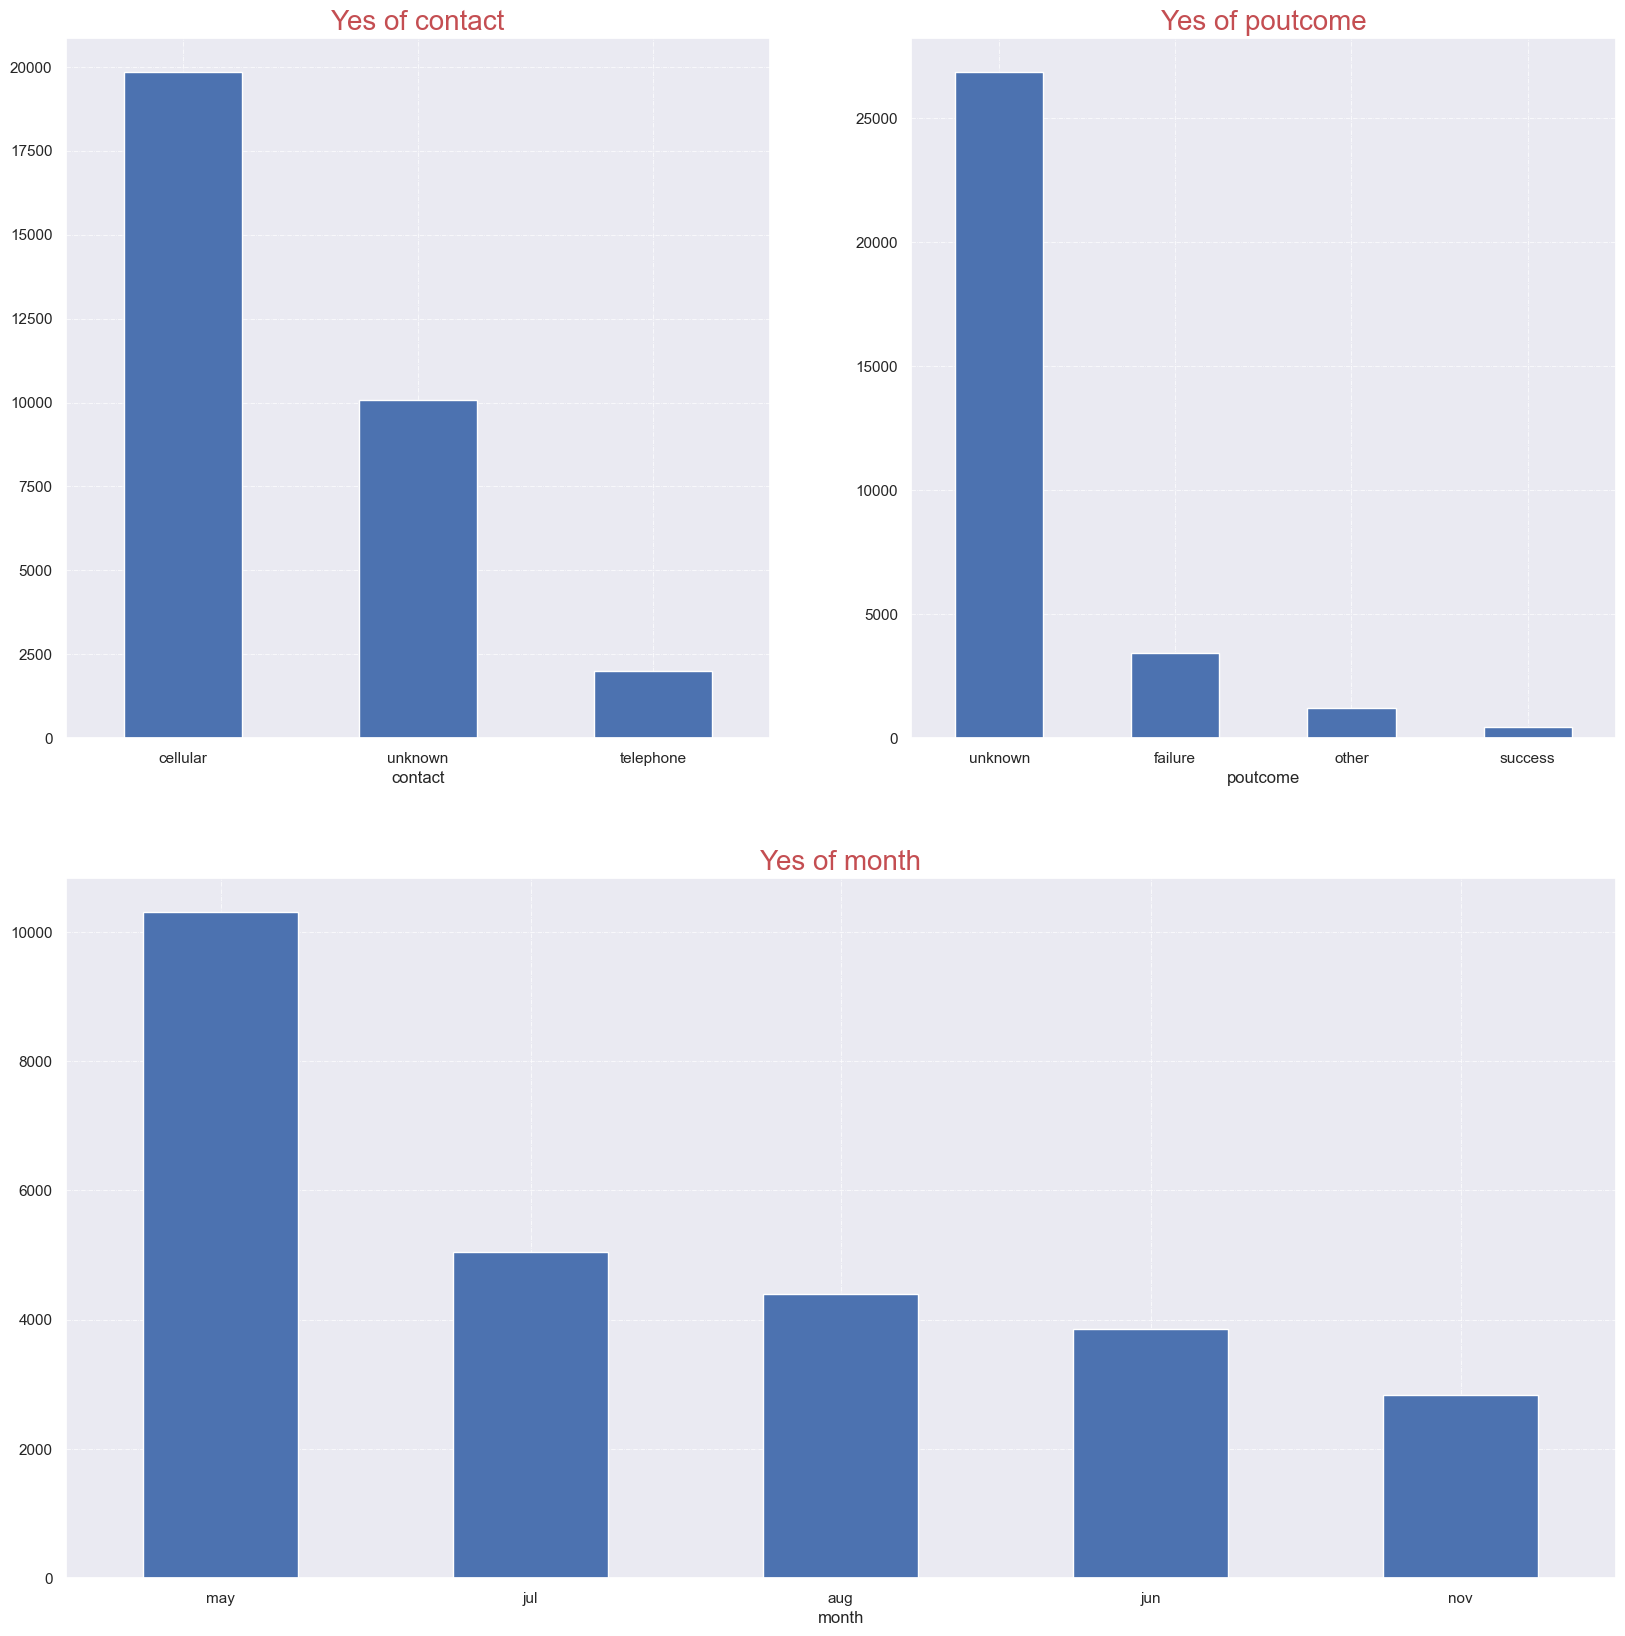

In [29]:
# make visualization 
# group by data base on category
con_cont_n  = analysis_n.groupby(["contact"])["contact"].count().sort_values(ascending=False).head(5)
con_day_n  = analysis_n.groupby(["poutcome"])["poutcome"].count().sort_values(ascending=False).head(5)
con_mon_n  = analysis_n.groupby(["month"])["month"].count().sort_values(ascending=False).head(5)

# Visualization of contact
plt.subplot(2, 2, 1)
con_cont_n.plot(x="contact", y="contact", kind="bar", figsize=(20, 20), rot= 0)
plt.title ("Yes of contact", size = 20, c = 'r')
plt.minorticks_on()
plt.grid(True, linewidth = 0.5, linestyle = '-.')

# Visualization of poutcome
plt.subplot(2, 2, 2)
con_day_n.plot(x="poutcome", y="poutcome", kind="bar", figsize=(20, 20), rot= 0)
plt.title ("Yes of poutcome", size = 20, c = 'r')
plt.minorticks_on()
plt.grid(True, linewidth = 0.5, linestyle = '-.')

# Visualization of month
plt.subplot(2, 1, 2)
con_mon_n.plot(x="month", y="month", kind="bar", figsize=(20, 20), rot= 0)
plt.title ("Yes of month", size = 20, c = 'r')
plt.minorticks_on()
plt.grid(True, linewidth = 0.5, linestyle = '-.')

New Insight by 'No' condition:
1. sum of 'No' condition for job the highest is 'blue-coller'
2. sum of 'No' condition for marital the highest is 'married'
3. sum of 'No' condition for education the highest is 'secondary'
4. sum of 'No' condition for default the highest is 'no'
5. sum of 'No' condition for housing the highest is 'yes'
6. sum of 'No' condition for loan the loan is 'no'
7. sum of 'No' condition for contact the contact is 'celluler'
8. sum of 'No' condition for poutcome the poutcome is 'unkown'
9. sum of 'No' condition for month the month is 'may'

In [30]:
# We want see different proportion data 
data_analysis[(data_analysis['y']=='no')].count()

age          31936
job          31936
marital      31936
education    31936
default      31936
balance      31936
housing      31936
loan         31936
contact      31936
day          31936
month        31936
duration     31936
campaign     31936
pdays        31936
previous     31936
poutcome     31936
y            31936
dtype: int64

([<matplotlib.patches.Wedge at 0x2fab77c9700>,
 [Text(-1.026513272761786, 0.3953106384147627, 'yes_y'),
  Text(1.0265132635088725, -0.3953106624420397, 'no_y')],
 [Text(-0.5599163305973377, 0.21562398458987056, '88.3%'),
  Text(0.559916325550294, -0.21562399769565802, '11.7%')])

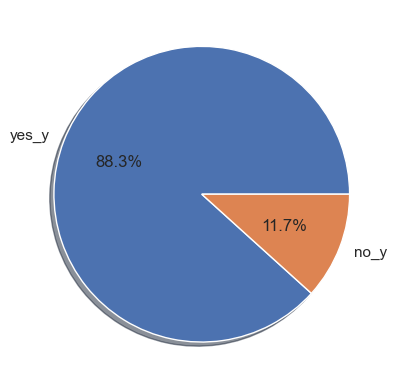

In [31]:
# we want see proportion column ['y'] between yes and no 

data_y = [31936, 4232]
label_y = ['yes_y', 'no_y']
plt.pie(data_y, labels=label_y, autopct='%1.1f%%', shadow=True)

([<matplotlib.patches.Wedge at 0x2fab9b753d0>,
 [Text(0.7778174593052024, 0.7778174593052024, 'outlier_No'),
  Text(-0.7778174593052025, -0.7778174593052023, 'outlier_yes')],
 [Text(0.4242640687119285, 0.4242640687119285, '25.0%'),
  Text(-0.4242640687119286, -0.42426406871192845, '75.0%')])

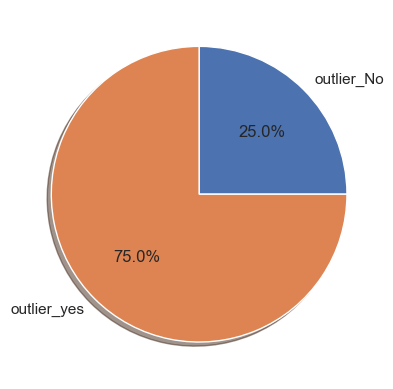

In [32]:
# we want see proportion data outlier column ['y'] between yes and no 
outlier_no = condition_outlier_upper[(condition_outlier_upper['y']=='no')].count()
outlier_yes = condition_outlier_upper[(condition_outlier_upper['y']=='yes')].count()

# Visualization Proportion
data_out = [4, 12]
label_out = ['outlier_No', 'outlier_yes']
plt.pie(data_out, labels=label_out, autopct='%1.1f%%', shadow=True)

New insights:
1. Proportion on columns [y] between yes and no is 88.3% : 11.7%
2. Proportion of data outlier between yes and no is 75% : 25%, mean is if customer have balance, duration, and age outlier maybe will deposite

## Correlation data

## Bivariant Method

#### Chi-square Method

Check significant data output ['y'] and ['housing'] because this data is different when comperation between condition ['y'] is "yes" and "no", with chi-square method because this is categorical vs categorical!

In [33]:
# we make chi-square
import researchpy as rp
table, results = rp.crosstab(data_analysis['housing'], 
                             data_analysis["y"], 
                             prop= 'col', test= 'chi-square')

# look percentage table
table

y                
y           no     yes     All
housing                       
no        42.0   63.19   44.48
yes       58.0   36.81   55.52
All      100.0  100.00  100.00

In [34]:
# look p-value
results

,Chi-square test,results
0,Pearson Chi-square ( 1.0) =,678.9524
1,p-value =,0.0000
2,Cramer's phi =,0.1370


p-value under 0.05 the meaning is have correlation between variables

In [35]:
from scipy import stats # modul statistic

dummies = pd.get_dummies(data_analysis['housing']) # make data dummy
dummies.head()

,no,yes
28686,1,0
9304,0,1
41425,1,0
44803,1,0
5878,0,1


Now we want make method Bonferroni-adjusted p-value for checking correlation with data dummy

In [36]:
# Process loooping for look corelation 
for series in dummies:
    nl = "\n"
    crosstab = pd.crosstab(dummies[series], data_analysis["y"])
    print(crosstab, nl)
    chi2, p, dof, expected = stats.chi2_contingency(crosstab)
    print(f"Chi2 value= {chi2}{nl}p-value= {p}{nl}Degrees of freedom= {dof}{nl}")

y      no   yes
no             
0   18522  1558
1   13414  2674 

Chi2 value= 678.0949154180396
p-value= 1.7346693811159908e-149
Degrees of freedom= 1

y       no   yes
yes             
0    13414  2674
1    18522  1558 

Chi2 value= 678.0949154180396
p-value= 1.7346693811159908e-149
Degrees of freedom= 1



In [37]:
# make code for show correlation with Bonferroni method
p_value = 0.05
bf_p_value = p_value/dummies.shape[1]
print("Bonferroni-adjusted p-value is %.3f" % bf_p_value)

Bonferroni-adjusted p-value is 0.025


The chi-squared test using the Bonferroni-adjusted p-value of 0.025 showes that all pairwise comparisons are significant.

We want to know for column job, marital, default, and loan. Does it have correlation with output ['y']?, because this categorical very logic. we use chi-square method because categorical vs categorical 

In [38]:
# make data dummy

#data dummy for job
dummies_job = pd.get_dummies(data_analysis['job'])

#data dummy for marital
dummies_marital = pd.get_dummies(data_analysis['marital'])

#data dummy for default
dummies_default = pd.get_dummies(data_analysis['default'])

#data dummy for loan
dummies_loan = pd.get_dummies(data_analysis['loan'])

#data dummy for month
dummies_month = pd.get_dummies(data_analysis['month'])


#data dummy for concact
dummies_contact = pd.get_dummies(data_analysis['contact'])

In [44]:
# make data function for data dummies
def dummies(data_dummies):
    """
    Make data dummy for show chisquare,
    p-value, and DOF from each columns input
    """
    for series in data_dummies:
        nl = "\n"
        crosstab = pd.crosstab(data_dummies[series], data_analysis["y"])
        print(crosstab, nl)
        chi2, p, dof, expected = stats.chi2_contingency(crosstab)

        print(f"Chi2 value= {chi2}{nl}p-value= {p}{nl}Degrees of freedom= {dof}{nl}")

# call all function            
dummies(dummies_job)    # job column
dummies(dummies_marital) # martial column
dummies(dummies_default) # default column
dummies(dummies_loan) # loan column
dummies(dummies_month) # month column
dummies(dummies_contact) # concat columns

y          no   yes
admin.             
0       28274  3723
1        3662   509 

Chi2 value= 1.0973012069013426
p-value= 0.29485914034199623
Degrees of freedom= 1

y               no   yes
blue-collar             
0            24672  3673
1             7264   559 

Chi2 value= 199.92589798915947
p-value= 2.167717230051005e-45
Degrees of freedom= 1

y                no   yes
entrepreneur             
0             30858  4133
1              1078    99 

Chi2 value= 12.416530947371879
p-value= 0.0004255500058154233
Degrees of freedom= 1

y             no   yes
housemaid             
0          31007  4146
1            929    86 

Chi2 value= 10.213459874238225
p-value= 0.001394193721358474
Degrees of freedom= 1

y              no   yes
management             
0           25473  3193
1            6463  1039 

Chi2 value= 42.03450795880352
p-value= 8.967683910402445e-11
Degrees of freedom= 1

y           no   yes
retired             
0        30550  3826
1         1386   406 

Chi2 value=

In [46]:
# see correlation with Bonferroni-adjusted
def correlation (dummies) :
    """"
    Function for check correlation with
    Bonferroni method
    """
    p_value = 0.05
    bf_p_value = p_value/dummies.shape[1]
    print("Bonferroni-adjusted p-value is %.3f" % bf_p_value)

# call data dummies
correlation(dummies_job) # job column
correlation(dummies_marital) # marital column
correlation(dummies_default) # default column
correlation(dummies_loan) # loan column
correlation(dummies_month) # month column
correlation(dummies_contact) # contact column

Bonferroni-adjusted p-value is 0.004
Bonferroni-adjusted p-value is 0.017
Bonferroni-adjusted p-value is 0.025
Bonferroni-adjusted p-value is 0.025
Bonferroni-adjusted p-value is 0.004
Bonferroni-adjusted p-value is 0.017


In [64]:
# sanichek
data_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36168 entries, 28686 to 15725
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        36168 non-null  int64 
 1   job        36168 non-null  object
 2   marital    36168 non-null  object
 3   education  36168 non-null  object
 4   default    36168 non-null  object
 5   balance    36168 non-null  int64 
 6   housing    36168 non-null  object
 7   loan       36168 non-null  object
 8   contact    36168 non-null  object
 9   day        36168 non-null  int64 
 10  month      36168 non-null  object
 11  duration   36168 non-null  int64 
 12  campaign   36168 non-null  int64 
 13  pdays      36168 non-null  int64 
 14  previous   36168 non-null  int64 
 15  poutcome   36168 non-null  object
 16  y          36168 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.0+ MB


Resume for correlation categorical vs data ['y']
the data < p-values, this mean is significant

we want look data numeric vs categorical output ['y']
data numeric is : balance with spearmen's rank method

In [66]:
from scipy.stats import spearmanr # method for correlation numeric VS categoric

# input data and Choose column integer
x = data_analysis['day'] # input data (change column data input for check)
y = data_analysis['y'] # data ouput

# print data
corr, _ = spearmanr(x, y)
print('Spearmans correlation: %.3f' % corr)

Spearmans correlation: -0.029


we not use ANOVA method because this variable output just 2 unique, then we use spearmen's rank method.
in the result, this correlation very low or nothing

## Multivariante

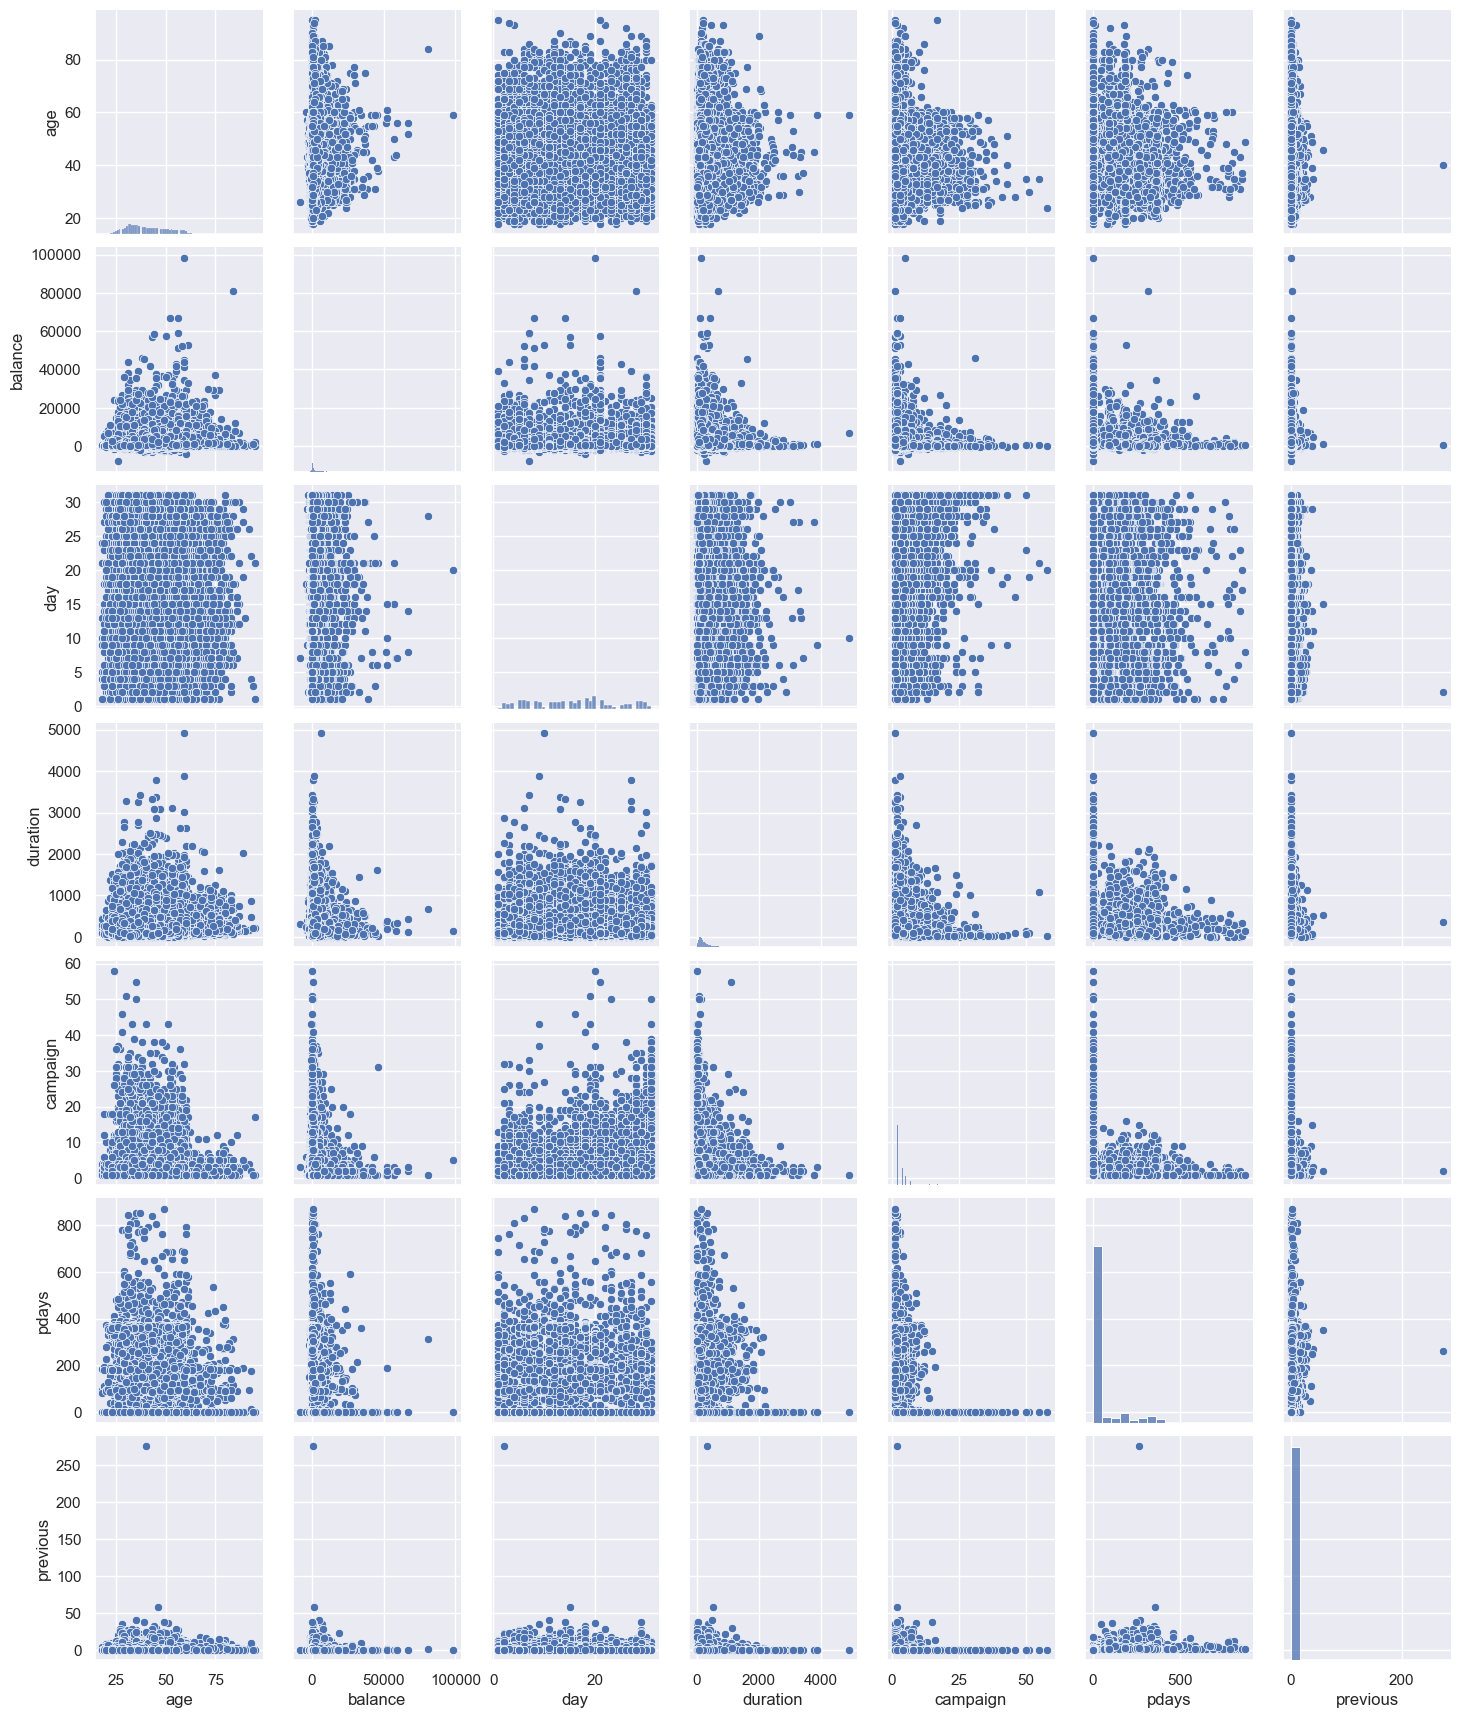

In [52]:
# we want to see pairplot
sns.pairplot(
    data=data_analysis, 
    aspect=.85,
    diag_kind="hist");

<AxesSubplot:>

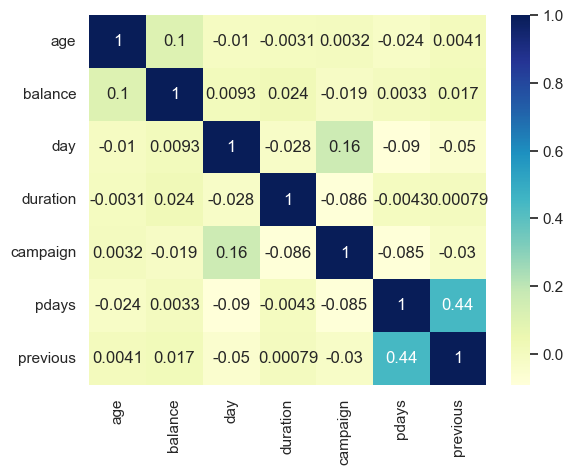

In [61]:
# make visualization Heatmap correlation 
sns.heatmap(data_analysis.corr("pearson"), cmap="YlGnBu", annot=True)